# <font color=blue>**Semana 4: Working with Dates and Times in Python**

* Capítulo 0: Bibliotecas, pacotes, módulos
* Capítulo 1: Dates and Calendars
* Capítulo 2: Combining Dates and Times
* Capítulo 3: Time Zones and Daylight Saving
* Capítulo 4: Easy and Powerful: Dates and Times in Pandas

<br/>

##**Links úteis:**

* [Link dos slides](https://drive.google.com/drive/folders/1VnrLT796MsNFt78g2kwnAPapMWYFvdCK?usp=share_link)
* [Link do curso](https://app.datacamp.com/learn/courses/working-with-dates-and-times-in-python)

**Responsáveis:** Cinthya e Maria Raquel

# **Capítulo 0**: Bibliotecas, pacotes, módulos

Antes de começarmos, vamos dar uma olhada em qual a diferença entre bibliotecas, pacotes e módulos! Isso pode nos ajudar a não fazer confusão com alguns detalhes desse curso.

Vamos partir de um nível hierárquico *menor* para o *maior*.


#### Módulo

Um **módulo** é um conjunto de códigos relacionados uns aos outros com o nome terminado em ```.py```. Em um módulo, pode-se definir funções, classes, variáveis...

Exemplos de módulo: ```random```, ```datetime```...

Dessa forma, de um módulo ```datetime``` podemos importar classes como ```date```, ```timedelta```, ```datetime``` (sim, classe ```datetime``` do módulo ```datetime```!), ```timezone```... 

Cada classe tem seus atributos.

In [ ]:
#Importando o módulo inteiro:
#import datetime

## Importando classes específicas do módulo datetime, a depender do que queremos utilizar:

# importando a classe date
from datetime import date # importando a classe date

from datetime import timezone # importando a classe timezone

from datetime import datetime # importando a classe datetime

from datetime import timedelta # importando a classe timedelta

from dateutil import tz # importando a classe tz do módulo dateutil

Algumas classes importantes para nós hoje:

**```datetime.date```**: atributos ```year, month``` e ```day```

**```datetime.datetime```**:  atributos```year, month, day, hour, minute, second, microsecond``` e ```tzinfo```

**```datetime.timedelta```**: timedelta nos ajuda criando uma "duração" de tempo que expressa a diferença entre duas instâncias de ```date```, ```time``` ou ```datetime```.

**```datetime.timezone```**: ajuda a aplicar fusos horários às nossas datetimes.



**Aqui cabe um disclaimer:** os atributos contidos em ```datetime.datetime``` não estão contidos em ```datetime.date```. Se formos usar ferramentas para mexer com datas que não contém horários, é melhor importarmos ```from datetime import date```!

#### Pacote

Um **pacote** é um **conjunto de módulos**. Na prática, ele é um diretório com um conjunto de módulos.

Para ser considerado um pacote, o diretório deve conter um arquivo chamado **```__init__.py```.**

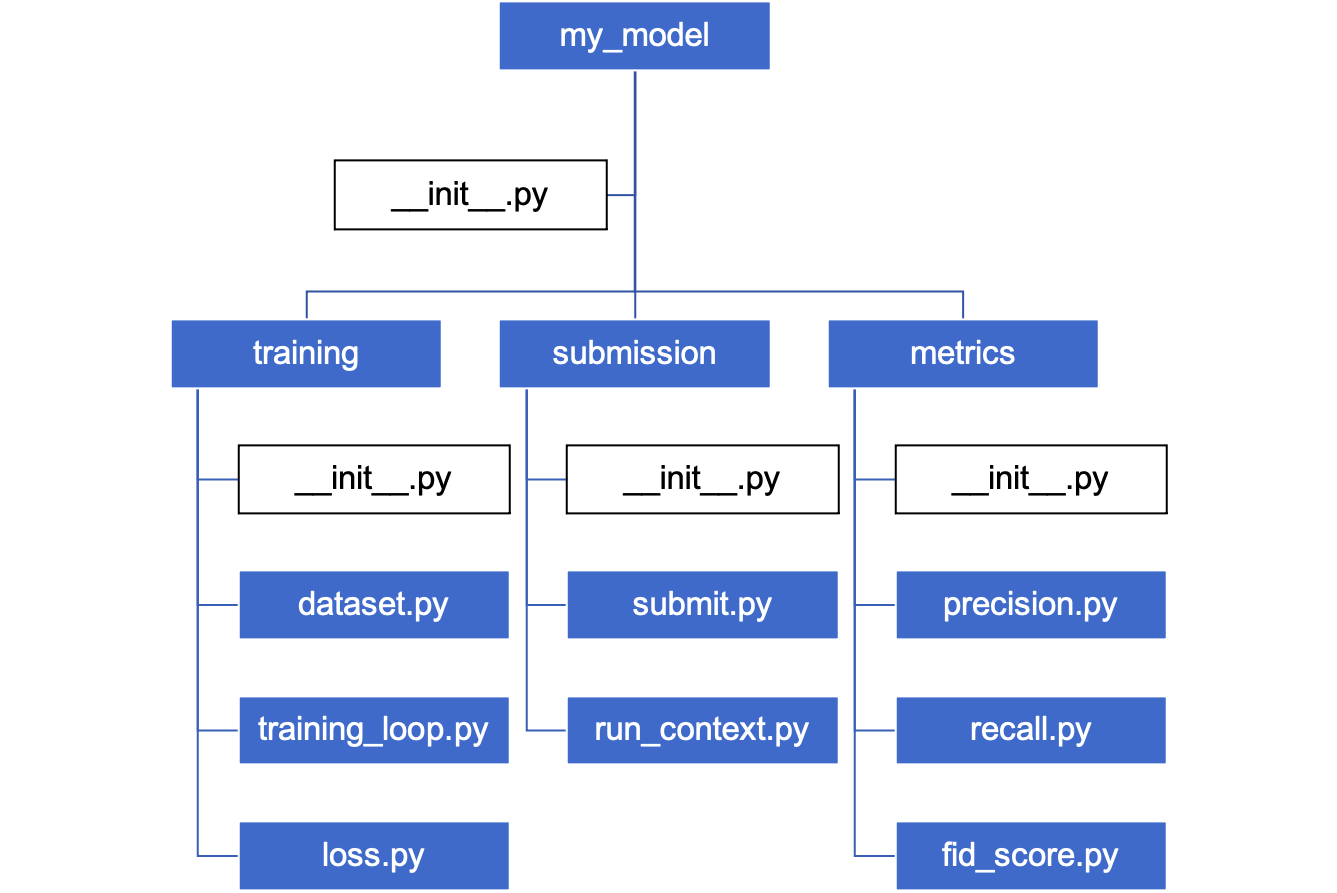

Fonte: https://learnpython.com/blog/python-modules-packages-libraries-frameworks/

Um pacote pode ter outros pacotse dentro dele *(subpacotes)*, como é o caso acima.

```NumPy``` e ```pandas``` são dois dos pacotes mais utilizados.


#### Bibliotecas

Bibliotecas e pacotes geralmente são usados como sinônimos. Isso porque uma biblioteca é um conjunto de pacotes, mas pacotes podem conter subpacotes também.

Dessa forma, ```NumPy``` e ```pandas``` também podem ser considerados bibliotecas.

Outras bibliotecas:
```Matplotlib```, ```PyTorch```.


**Lembrando que mais importante do que as nomenclaturas, é sabermos aplicar tudo isso no nosso código!**


In [ ]:
#Importando a função load_dataset() do módulo dataset do subpacote training do pacote my_model

#import my_model.training.dataset.load_dataset()

## **Capítulo 1:** ```datetime.date```



A classe ```datetime.date``` resolve uma série de problemas para nós.

* Não precisamos nos preocupar com saber quantos dias tem cada mês do ano para realizar cálculos, ou saber quais anos são bissextos, etc
* Descobrir quanto tempo passou entre duas datas
* Descobrir qual era o dia da semana de uma determinada data
* Ordenar uma lista de datas da mais antiga para a mais recente (ou vice-versa)


Nessa primeira parte, iremos mexer com o módulo ```date``` de ```datetime```.

In [ ]:
from datetime import date

#### Criando datas e alguns atributos básicos



Do maior valor para o menor!

```date(year, month, day)``` 



In [ ]:
# O dia do programador foi criado em 2022, na Rússia. É o 256º dia do ano (13 de setembro ou 12 de setembro em dias bissextos).
# 256 é a quantidade de valores distintos que podem ser representados com 1 byte (8 bits)

dia_do_programador = date(2002, 9, 13)
print(dia_do_programador)
print(type(dia_do_programador))

2002-09-13
<class 'datetime.date'>


In [ ]:
# Descobrindo o dia da semana da data criada

dia_do_programador.weekday()
# 0: segunda
# 1: terça
# 2: quarta
# 3: quinta
# 4: sexta
# 5: sábado
# 6: domingo


4

In [ ]:
ontem = date(2023, 2, 10)
print(ontem.weekday())

print(date(2023,2,11).weekday())

4
5


In [ ]:
# Podemos criar uma lista com as datas de nascimento/aniversário de cada bixo da dev:
bixos = ['Carlos', 'Cinthya', 'Isadora', 'Jhonatan', 'Lorenzo', 'Maria Raquel']
aniversarios_ord_alfabetica = [date(2000, 1, 20), date(2003, 8, 21), date(2003, 1, 11), date(1997, 10, 1), date(2003, 4, 26), date(2001, 2, 16)]

# Dict comprehension para criar um dicionário com o aniversário de cada um
dict_niver = {nome:niver for nome, niver in zip(bixos, aniversarios_ord_alfabetica)}
print(dict_niver)



{'Carlos': datetime.date(2000, 1, 20), 'Cinthya': datetime.date(2003, 8, 21), 'Isadora': datetime.date(2003, 1, 11), 'Jhonatan': datetime.date(1997, 10, 1), 'Lorenzo': datetime.date(2003, 4, 26), 'Maria Raquel': datetime.date(2001, 2, 16)}


In [ ]:
# Podemos colocar a lista de datas em ordem crescente com facilidade graças à datetime.date:

aniversarios_bixos = sorted(aniversarios_ord_alfabetica)
print(aniversarios_bixos)

[datetime.date(1997, 10, 1), datetime.date(2000, 1, 20), datetime.date(2001, 2, 16), datetime.date(2003, 1, 11), datetime.date(2003, 4, 26), datetime.date(2003, 8, 21)]


In [ ]:
# Quem é o bixo mais velho?

mais_velho = {i for i in dict_niver if dict_niver[i] == max(aniversarios_ord_alfabetica)}
print(mais_velho)

# Quem é o bixo mais novo?

mais_novo = {i for i in dict_niver if dict_niver[i] ==  min(aniversarios_ord_alfabetica)}
print(mais_novo)


{'Cinthya'}
{'Jhonatan'}


Atributos ```.year```, ```.month```, ```.day```

In [ ]:
ontem = date(2023, 2, 10)
print(ontem.year)
print(ontem.month)
print(ontem.day)

2023
2
10


Podemos, por exemplo, contar a quantidade de aniversários por mês.

In [ ]:
# Retomando o dicionário com bixos/aniversários
print(dict_niver)

# Criando um dicionário para armazenar a quantidade de aniversários por mês
relacao_niver_mes = {mes:0 for mes in range(1,13)}

for aniversario in dict_niver:
  # Pegamos o mês de cada bixo
  mes = dict_niver[aniversario].month
  # Somamos +1 na lista de aniversários/mês
  relacao_niver_mes[mes] += 1

print(relacao_niver_mes)

{'Carlos': datetime.date(2000, 1, 20), 'Cinthya': datetime.date(2003, 8, 21), 'Isadora': datetime.date(2003, 1, 11), 'Jhonatan': datetime.date(1997, 10, 1), 'Lorenzo': datetime.date(2003, 4, 26), 'Maria Raquel': datetime.date(2001, 2, 16)}
{1: 2, 2: 1, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0, 10: 1, 11: 0, 12: 0}


#### Operações básicas com datas e ```timedelta```

Podemos subtrair datas para descobrir a variação de tempo entre elas e gerar um objeto timedelta.

In [ ]:
# Vamos ver a variação de tempo entre o nascimento do bixo mais velho e do bixo mais novo.

td = dict_niver['Cinthya'] - dict_niver['Jhonatan']
print(type(td))


<class 'datetime.timedelta'>


Os objetos timedelta possuem um atributo chamado ```.days``` que retorna a quantidade de dias correspondente a essa variação de tempo.



In [ ]:
td.days

2150

E se quisermos fazer o processo **reverso**, ou seja, gerar datas a partir de um ```timedelta``` (uma variação de tempo pré-estabelecida)?

Geramos um objeto timedelta a partir de duas datas somente com o módulo ```datetime.date```. Para o processo reverso, vamos importar o módulo ```timedelta```.

In [ ]:
from datetime import timedelta

Usaremos a função ```timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)``` para criar uma variação de tempo.


In [ ]:
semana = timedelta(seconds = 60*60*24*7)
print(semana)
semana = timedelta(minutes = 60*24*7)
print(semana)
semana = timedelta(hours = 24*7)
print(semana)
semana = timedelta(days = 7)
print(semana)
semana = timedelta(weeks = 1)
print(semana)
print(type(semana))

7 days, 0:00:00
7 days, 0:00:00
7 days, 0:00:00
7 days, 0:00:00
7 days, 0:00:00
<class 'datetime.timedelta'>


In [ ]:
dia = date(2023, 02, 11)
dia = dia + semana
print(dia)

SyntaxError: ignored

Soma e subtração, ```timedelta```

In [ ]:
#from datetime import date
from datetime import datetime
from datetime import date

#### Manipulando a formatação de objetos ```date```

Por padrão, o *python* printa as datas no formato ISO 8601: **```YYYY-MM-DD```**. As *strings* ISO vão ter sempre o mesmo tamanho, pois se algum dos valores tiver menos de dois dígitos, um 0 vai aparecer no lugar do dígito mais à esquerda.

Uma das maiores vantagens de deixar as datas no formato ISO é que ele é **padrão**: ou seja, se algum código precisar pegar suas datas formatadas em ISO 8601 e colocá-las em ordem crescente ou decrescente, ele vai entendê-las.


In [ ]:
d = date(2023, 2, 10)
print(d)

2023-02-10


Podemos printar a data como uma *string* no formato ISO usando o método isoformat()

In [ ]:
d.isoformat()

'2023-02-10'

Para printar datas fora do formato ISO, você pode usar o método ```.strftime()```. Esse método é bem flexível. Ele **transforma um objeto ```datetime.date``` em uma ```string```.**

**```%Y```**: printa o *ano*

**```%m```**: printa o *mês*

**```%d```**: printa o *dia*


In [ ]:
d = date(2023, 2, 10)

# Printando com isoformat():

d.isoformat()


'2023-02-10'

In [ ]:
# Printando com strftime():

d.strftime('%d/%m/%Y')

'10/02/2023'

In [ ]:
d.strftime('Ano: %Y | Mês: %m | Dia: %d')

'Ano: 2023 | Mês: 02 | Dia: 10'

**Obs.:** no começo do cap. 2 veremos a função ```strptime()```. **Não confundir** com a ```strftime()``` que acabamos de ver! 

A ```strftime()``` que acabamos de ver transforma um objeto ```datetime.date```em uma string. A ```strptime()``` que veremos transforma uma ```string``` em um objeto ```datetime.datetime```.

Destacar que o Python não processa tempos e datas que não estão no padrão de dois dígitos, tipo '1/3/2022'. A gente pode talvez mostrar algum jeito de passar as strings pra esse formato pra que aí sim seja possível aplicar as funções e métodos da biblioteca

## **Capítulo 2**: ```datetime.datetime```








Agora aplicaremos o módulo ```datetime.datetime```: trabalharemos não só com *datas*, mas também com **horas**!

#### Criação de um ```datetime```

vamos usar a função ```datetime``` *(sim, que é do módulo ```datetime``` do pacote ```datetime```)*

Estrutura:

```datetime(year, month, day, hours, minutes, seconds, microseconds)```

As horas são nos nosso formato *(graças a deus)* e vão de 0 a 24h.


In [ ]:
# Importando o nosso módulo de interesse 
from datetime import datetime

hora = datetime(2023,2,10,21,25,33)
print(hora)
print(type(hora))

2023-02-10 21:25:33
<class 'datetime.datetime'>


#### Formatação de um ```datetime```

O formato ISO para ```datetime``` é **```YYY-mm-ddTHH:MM:SS```**

In [ ]:
hora.isoformat()

'2023-02-10T21:25:33'

Podemos susbstituir as informações em um datetime usando o método ```.replace()```:

In [ ]:
hora = hora.replace(day = 11, hour = 11, minute = 15)
hora.isoformat()

'2023-02-11T11:15:33'

O método ```strptime()``` permite que transformemos uma ```string``` em um objeto ```datetime.datetime```.

```datetime.strptime(string, formatação)```

**Isso é útil pois em muitos *datasets* a data-hora está em formato de string.**

A formatação funciona de um jeito parecido com ```strftime()```:

```%Y```: anos

```%m```: meses

```%d```: dias

```%H```: horas

```%M```: minutos

```%S```: segundos

In [ ]:
# Vamos criar um par string e format que sejam perfeitamente compatíveis para criar um datetime.
# A função lerá nossa string datetime a partir da formatação
hora = '02/10/2023 22:02:00'
formatacao = '%d/%m/%Y %H:%M:%S'
datetime.strptime(hora, formatacao)

datetime.datetime(2023, 10, 2, 22, 2)

In [ ]:
#Não precisa colocar os dias, meses, minutos, segundos e horas com dois dígitos
hora = '2/10/2023 22:2:00'
formatacao = '%d/%m/%Y %H:%M:%S'
datetime.strptime(hora, formatacao)

datetime.datetime(2023, 10, 2, 22, 2)

In [ ]:
#Este código não funcionará, porque a string e a formatação não batem:
hora = '02/10/2023 22:02:00'
formatacao = '%d%m/%Y %H:%M:%S'
datetime.strptime(hora, formatacao)

ValueError: ignored

#### Timestamps e duração para datetimes

Datas também podem ser representadas a partir de ```timestamps```: a **quantidade de segundos desde 1 de janeiro de 1970**. Para converter timestamps em um ```datetime```, usamos a função ```datetime.fromtimestamp(timestamp)```:

```fromtimestamp()``` retorna a data a partir de um timestamp (quantidade de segundos desde 1 de janeiro de 1970.

In [ ]:
ts = 1514665153
date = datetime.fromtimestamp(ts)
print(date)

2017-12-30 20:19:13


A função ```timestamp()```, por sua vez, retorna a quantidade de segundos desde 01 de janeiro de 1970.


In [ ]:
from datetime import datetime
data_aleatoria = datetime(2003,8,21,5)
ts = data_aleatoria.timestamp()
print(ts)
print(type(ts))

1061442000.0
<class 'float'>


*Curiosidade*: o maior número que alguns computadores *mais antigos* podem armazenar em uma variável é ```2147483648```, que como timestamp corresponde a janeiro de 2038.


Podemos pegar a quantidade de segundos existente numa duração criando um objeto ```timedelta``` e então usando o método ```total_seconds()```

In [ ]:
data1 = datetime(2003, 8, 21, 22, 12, 54)
data2 = datetime(1968, 12, 30, 9, 26, 12)
dif = data1 - data2
print(dif)
print(type(dif))

12652 days, 12:46:42
<class 'datetime.timedelta'>


In [ ]:
dif.total_seconds()

1093178802.0

**Disclaimer:** não confundir ```.total_seconds()``` com ```.second```! 

```.total_seconds()``` é um método para objetos ```timedelta``` e ```.second``` é um atributo dos objetos ```datetime``` que indica a quantidade de segundos desse ```datetime```.

In [ ]:
print(type(data1))
data1.second

<class 'datetime.datetime'>


54

**A partir do capítulo seguinte, as informações de data e hora terão CONTEXTO, a partir de outros módulos e de outros pacotes de tempo e data.**

## **Capítulo 3**: Fuso horário e Horário de verão

UTC é um padrão internacional de tempo que representa datas e horas de todo o mundo tendo como base o horário do Reino Unido (UTC +0 ou Horário Do Meridiano De Greenwich).

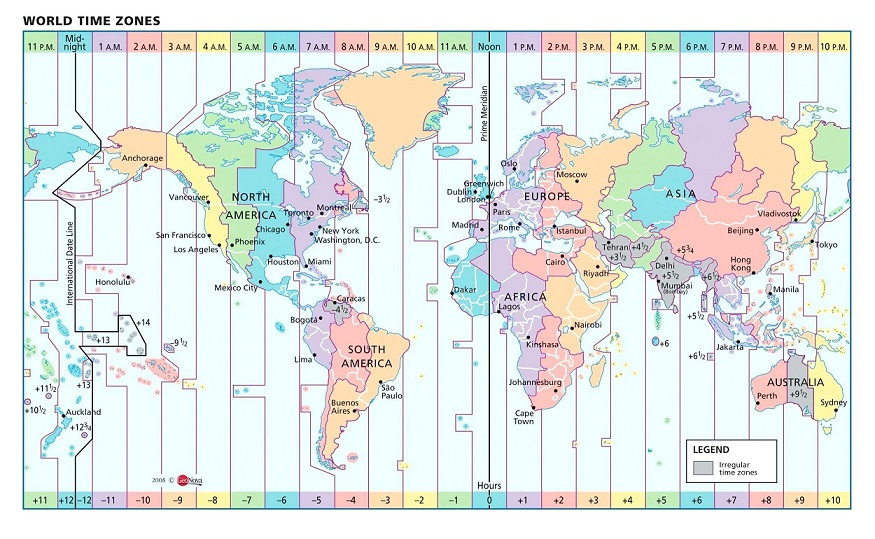

### Curiosidades 
* Você sabia que a Rússia e a França estão empatadas no maior número de fusos horários, com 12 cada país? A França em si tem apenas um fuso horário, mas isso ocorre devido aos territórios das colônias francesas, como Guiana Francesa.
* A China só tem uma timezone, mesmo diante do extenso tamanho de seu território (3º maior país do mundo em dimensão territorial). Tem uma segunda não-oficial muito usada pelos Uyghur.
* Você sabia que não há fuso horário oficial no Polo Norte ou Polo Sul? Como todas as linhas de longitude se encontram, cabe a cada viajante (ou estação de pesquisa) decidir que horas deseja usar.

`timezone.utc` é uma classe usada para representar um fuso horário

In [ ]:
# Imports
from datetime import datetime, timedelta, timezone

In [ ]:
# Criando um objeto timezone para representar o fuso Pacific Standard Time, or UTC-8
pst = timezone(timedelta(hours=-8))

# Criando um objeto datetime e estabelecendo o fuso com o parâmetro tzinfo
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=pst)
print(dt)

2017-10-01 15:26:26-08:00


Dá pra alterar o fuso usando `.replace()`:

In [ ]:
# Cria um objeto timezone que corresponde ao fuso UTC-4
edt = timezone(-timedelta(hours = 4))

# Atualiza o datetime com replace
dt = dt.replace(tzinfo=edt)
print(dt)

2017-10-01 15:26:26-04:00


E com `.astimezone()` também:

In [ ]:
# Criando um objeto timezone que corresponde ao fuso UTC+05:30 (Indian Standard Time)
ist = timezone(timedelta(hours=5, minutes=30))

# Atualiza o datetime com astimezone
print(dt.astimezone(ist))

2017-10-02 00:56:26+05:30


Qual a diferença de modificar a `tzinfo` direto no `datetime`, usar `.replace()` ou usar `.astimezone()`?
* `.replace()` é usado para criar um novo datetime com valores específicos para algumas propriedades, incluindo tzinfo
* `.astimezone()` é usado para converter um mesmo objeto datetime de um fuso horário para outro
* Mudar o `tzinfo` diretamente não é muito recomendado, pois pode gerar informações de fuso erradas caso, por exemplo, a hora local esteja em horário de verão e você não tenha considerado esse ajuste no timezone

#### Timezone database
O "tz database" é uma base de dados de informações sobre todos os fusos horários do mundo com dados precisos e frequentemente utilizados, incluindo ajustes de horário (como horário de verão), regras de transição de horário e nomes de fuso horário de local

In [ ]:
# Imports
from datetime import datetime
from dateutil import tz

Sintaxe

```tz.gettz(location)```

```location = '[Continent]/[City]'```

In [ ]:
# Acessando os fusos da base de dados
manaus = tz.gettz('America/Manaus')
sampa = tz.gettz('America/Sao_Paulo')

# Alterando o fuso
print(dt.astimezone(manaus))
print(dt.astimezone(sampa))

2017-10-01 15:26:26-04:00
2017-10-01 16:26:26-03:00


Exemplos de ```location``` que podem ser utilizados:

```
'America/New_York'
'America/Sao_Paulo'
'America/Recife'
'America/Santiago'
'America/Puerto_Rico'
'Brazil/Acre'
'Brazil/DeNoronha'
'Asia/Beirut'
'Asia/Gaza'
'Asia/Hong_Kong'
'Atlantic/Cape_Verde'
'Atlantic/Bermuda'
'Australia/Sydney'
'Canada/Pacific'
```
Lista completa: https://en.wikipedia.org/wiki/List_of_tz_database_time_zones


###Início do Horário de Verão

**Método 1: Considerar o deslocamente manualmente**

Como não fazer:

In [ ]:
# Definindo timezones sem e com horário de verão
EST = timezone(timedelta(hours=-5))
EDT = timezone(timedelta(hours=-4))

# Definindo objeto datetime
spring_ahead_159am = datetime(2017, 3, 12, 1, 59, 59)
spring_ahead_3am = datetime(2017, 3, 12, 3, 0, 0)

# Print
print(spring_ahead_159am.isoformat())
print(spring_ahead_3am.isoformat())

2017-03-12T01:59:59
2017-03-12T03:00:00


In [ ]:
# Diferença de tempo sem timezone aware
(spring_ahead_3am - spring_ahead_159am).total_seconds()

3601.0

Como fazer:

In [ ]:
# Definindo parâmetro tzinfo e tornando-os conscientes do horário de verão com
# replace ao definir tzinfo
spring_ahead_159am = spring_ahead_159am.replace(tzinfo=EST)
spring_ahead_3am = spring_ahead_3am.replace(tzinfo=EDT)

# Print
print(spring_ahead_159am)
print(spring_ahead_3am)

2017-03-12 01:59:59-05:00
2017-03-12 03:00:00-04:00


In [ ]:
# Diferença de tempo com timezone aware
(spring_ahead_3am - spring_ahead_159am).total_seconds()

1.0

**Método 2: Usando a biblioteca `dateutil`**

In [ ]:
from dateutil import tz

In [ ]:
eastern = tz.gettz('America/New_York')

In [ ]:
spring_ahead_159am = datetime(2017, 3, 12, 1, 59, 59, tzinfo = eastern)
print(spring_ahead_159am)

2017-03-12 01:59:59-05:00


In [ ]:
spring_ahead_3am = datetime(2017, 3, 12, 3, 0, 0, tzinfo = eastern)
print(spring_ahead_3am)

2017-03-12 03:00:00-04:00


In [ ]:
(spring_ahead_3am - spring_ahead_159am).total_seconds()
# Por algum motivo, deu errado...

3601.0

**Método 3: Usando a biblioteca `pytz` e a função `localize`**

In [ ]:
import pytz

In [ ]:
eastern = pytz.timezone('America/New_York')

In [ ]:
spring_ahead_159am = eastern.localize(datetime(2017, 3, 12, 1, 59, 59))
print(spring_ahead_159am)

2017-03-12 01:59:59-05:00


In [ ]:
spring_ahead_3am = eastern.localize(datetime(2017, 3, 12, 3, 0, 0))
print(spring_ahead_3am)

2017-03-12 03:00:00-04:00


In [ ]:
(spring_ahead_3am - spring_ahead_159am).total_seconds()

1.0

A função `.localize()` associa informações de fuso horário a um datetime sem informações de fuso horário. Assim, a biblioteca `pytz` também toma ciência do horário de verão para aquele fuso.

###Fim do Horário de Verão

Por exemplo, em 5 de novembro de 2017, às 2 da manhã, os relógios da Zona de Tempo Oriental voltaram uma hora, ou seja, houve duas 1 da manhã.

In [ ]:
# Estabelecendo timezone com a biblioteca pytz
eastern = tz.gettz('US/Eastern')

# Criando um datetime para a primeira vez que foi 1 da manhã no dia
first_1am = datetime(2017, 11, 5, 1, 0, 0, tzinfo = eastern)
first_1am.isoformat()

'2017-11-05T01:00:00-04:00'

In [ ]:
# Verificando se o dado é ambíguo
tz.datetime_ambiguous(first_1am)

True

Para resolver essa questão, a função `.enfold()` "dobra" a data e hora para que sejam representadas corretamente.

In [ ]:
# Criando outro objeto datetime para a segunda vez que foi 1 da manhã no dia
second_1am = datetime(2017, 11, 5, 1, 0, 0, tzinfo = eastern)

# Aplicando a função enfold
second_1am = tz.enfold(second_1am)

In [ ]:
# Diferença
(second_1am - first_1am).total_seconds()

0.0

Isso se deu porque first_1am e second_1am representam o mesmo horário com `.enfold()`.

In [ ]:
# Mostrando que astimezone não considera automaticamente o horário de verão
first_1am = first_1am.astimezone(tz.UTC)
second_1am = second_1am.astimezone(tz.UTC)

In [ ]:
# Diferença
(second_1am - first_1am).total_seconds()

3600.0

## **Capítulo 4**: Datetime e Pandas

###Lendo dados de data e tempo com pandas

In [ ]:
!pip install isodate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Imports
import pandas as pd
import pytz
import datetime
import plotly.express as px
import isodate
from datetime import timedelta

Podemos usar o parâmetro `parse_dates` para indicar as colunas de um df com objetos datetime.

In [ ]:
# Leitura da base
df = pd.read_excel('YoutubeFEAdev.xlsx', parse_dates = ['publishedAt','extraction_date'], index_col=0)
df.head(3)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,extraction_date
0,5e3JzRWGuBU,FEA Dev,DINÂMICA DO CANAL - ASSISTAM!,Fala devs! Nesse vídeo explicamos a dinâmica d...,"['FEA.dev', 'Programação', 'Workshop', 'Python...",2020-05-08 14:40:26+00:00,429,32,0,PT1M36S,2023-02-08 11:31:34.267373
1,aZuTq9yqZ1o,FEA Dev,Introdução ao Python e o Anaconda,Fala devs! Nesse vídeo Vamos ensinar vocês a i...,"['FEA.dev', 'Python', 'Programação', 'Anaconda...",2020-05-08 20:10:28+00:00,3132,274,11,PT8M57S,2023-02-08 11:31:34.267373
2,m-Z3sV9n_7g,FEA Dev,Como usar o PIP?,Fala devs! Nesse vídeo vamos ensinar a como im...,"['Python', 'FEA.dev', 'PIP', 'Bibliotecas', 'P...",2020-05-08 20:00:11+00:00,559,23,1,PT4M42S,2023-02-08 11:31:34.267373


Ou podemos ler as colunas como string primeiramente e depois convertê-las para datetime com a função `.to_datetime()`

In [ ]:
#df = pd.read_excel('YoutubeFEAdev.xlsx', index_col=0)
#df['publishedAt'] = pd.to_datetime(df['publishedAt'], format = '%Y-%m-%dT%H:%M:%S')
#df['extraction_date'] = pd.to_datetime(df['extraction_date'], format = '%Y-%m-%d %H:%M:%S')

`.tz_localize()` trata uma coluna de datas e tempos sem informação de fuso horário

In [ ]:
# Localizar informação de fuso horário da coluna
df['extraction_date'] = df['extraction_date'].dt.tz_localize('UTC')

A partir disso, podemos converter a coluna para qualquer fuso horário.

In [ ]:
# Define o fuso horário local
local_tz = pytz.timezone("America/Sao_Paulo")

# Converte as colunas 'timestamp_utc' para o fuso horário local
df[['publishedAt', 'extraction_date']] = df[['publishedAt', 'extraction_date']].applymap(lambda x: x.replace(tzinfo = local_tz))
df.head(3)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,extraction_date
0,5e3JzRWGuBU,FEA Dev,DINÂMICA DO CANAL - ASSISTAM!,Fala devs! Nesse vídeo explicamos a dinâmica d...,"['FEA.dev', 'Programação', 'Workshop', 'Python...",2020-05-08 14:40:26-03:00,429,32,0,PT1M36S,2023-02-08 11:31:34.267373-03:00
1,aZuTq9yqZ1o,FEA Dev,Introdução ao Python e o Anaconda,Fala devs! Nesse vídeo Vamos ensinar vocês a i...,"['FEA.dev', 'Python', 'Programação', 'Anaconda...",2020-05-08 20:10:28-03:00,3132,274,11,PT8M57S,2023-02-08 11:31:34.267373-03:00
2,m-Z3sV9n_7g,FEA Dev,Como usar o PIP?,Fala devs! Nesse vídeo vamos ensinar a como im...,"['Python', 'FEA.dev', 'PIP', 'Bibliotecas', 'P...",2020-05-08 20:00:11-03:00,559,23,1,PT4M42S,2023-02-08 11:31:34.267373-03:00


###Transformando dadods datetime em um df

`day_name()` retorna o nome do dia da semana representado pelo objeto datetime.

In [ ]:
# Convertendo coluna de data de publicação para uma de string com o nome 
# do dia da semana em que o vídeo foi publicado
df['weekday'] = df['publishedAt'].dt.day_name()
df.head(3)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,extraction_date,weekday
0,5e3JzRWGuBU,FEA Dev,DINÂMICA DO CANAL - ASSISTAM!,Fala devs! Nesse vídeo explicamos a dinâmica d...,"['FEA.dev', 'Programação', 'Workshop', 'Python...",2020-05-08 14:40:26-03:00,429,32,0,PT1M36S,2023-02-08 11:31:34.267373-03:00,Friday
1,aZuTq9yqZ1o,FEA Dev,Introdução ao Python e o Anaconda,Fala devs! Nesse vídeo Vamos ensinar vocês a i...,"['FEA.dev', 'Python', 'Programação', 'Anaconda...",2020-05-08 20:10:28-03:00,3132,274,11,PT8M57S,2023-02-08 11:31:34.267373-03:00,Friday
2,m-Z3sV9n_7g,FEA Dev,Como usar o PIP?,Fala devs! Nesse vídeo vamos ensinar a como im...,"['Python', 'FEA.dev', 'PIP', 'Bibliotecas', 'P...",2020-05-08 20:00:11-03:00,559,23,1,PT4M42S,2023-02-08 11:31:34.267373-03:00,Friday


Usando `.groupby()` com datas e tempos em um df

In [ ]:
# Agrupando as linhas da coluna 'weekday' de acordo com o dia da semana e
# somando a quantidade de views por dia
df.groupby('weekday')['viewCount'].sum()

weekday
Friday       13716
Monday         212
Saturday      2277
Sunday        2350
Thursday      1312
Wednesday     8579
Name: viewCount, dtype: int64

In [ ]:
# Criando uma coluna de interações totais e calculando a métrica
# de interações a cada cem views
df['videoInteractions'] = pd.DataFrame(df.loc[:, ['likeCount','commentCount']].sum(axis = 1))
df['interCemViews'] = round(df['videoInteractions']/ df['viewCount'] * 100,2)

In [ ]:
# Agrupando as linhas da coluna 'weekday' de acordo com o dia da semana e
# calculando a média de interações a cada cem views por dia da semana
interacao_diasem = df.groupby('weekday')['interCemViews', ].mean().sort_values(by='interCemViews')

In [ ]:
# Plotando gráfico de barras
fig = px.histogram(interacao_diasem, x=interacao_diasem.index, y="interCemViews", color = interacao_diasem.index, width=750, height=400,
                  labels = {'dayofWeek': 'Dia da semana'})
fig.show()

###Trabalhando com dados sobre duração de tempo

In [ ]:
# Convertendo a coluna "duration" do formato ISO 8601 para segundos
(df['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())).head(3)

0     96.0
1    537.0
2    282.0
Name: duration, dtype: float64

In [ ]:
# Convertendo a coluna "duration" do formato ISO 8601 para timedelta
def converterisoduration(string):
  parsear = isodate.parse_duration(string)
  conversao = timedelta(seconds=int(parsear.total_seconds()))
  return conversao

In [ ]:
# Aplicando a função na colunta 'duration'
df['duration'] = df['duration'].apply(lambda x: converterisoduration(x))
df.head(3)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,extraction_date,weekday,videoInteractions,interCemViews
0,5e3JzRWGuBU,FEA Dev,DINÂMICA DO CANAL - ASSISTAM!,Fala devs! Nesse vídeo explicamos a dinâmica d...,"['FEA.dev', 'Programação', 'Workshop', 'Python...",2020-05-08 14:40:26-03:00,429,32,0,0 days 00:01:36,2023-02-08 11:31:34.267373-03:00,Friday,32,7.46
1,aZuTq9yqZ1o,FEA Dev,Introdução ao Python e o Anaconda,Fala devs! Nesse vídeo Vamos ensinar vocês a i...,"['FEA.dev', 'Python', 'Programação', 'Anaconda...",2020-05-08 20:10:28-03:00,3132,274,11,0 days 00:08:57,2023-02-08 11:31:34.267373-03:00,Friday,285,9.10
2,m-Z3sV9n_7g,FEA Dev,Como usar o PIP?,Fala devs! Nesse vídeo vamos ensinar a como im...,"['Python', 'FEA.dev', 'PIP', 'Bibliotecas', 'P...",2020-05-08 20:00:11-03:00,559,23,1,0 days 00:04:42,2023-02-08 11:31:34.267373-03:00,Friday,24,4.29


In [ ]:
# Outras operações com data e tempo + pandas
print(df['duration'].sum())

0 days 13:16:10


In [ ]:
# Outras operações com data e tempo + pandas
(df['extraction_date'] - df['publishedAt']).head(3)

0   1005 days 20:51:08.267373
1   1005 days 15:21:06.267373
2   1005 days 15:31:23.267373
dtype: timedelta64[ns]

In [ ]:
# Outras operações com data e tempo + pandas
df.groupby('weekday')['duration'].median()

weekday
Friday             0 days 00:14:57
Monday             0 days 00:13:28
Saturday           0 days 01:00:43
Sunday             0 days 00:12:29
Thursday    0 days 00:18:12.500000
Wednesday          0 days 00:10:59
Name: duration, dtype: timedelta64[ns]

`.resample()` agrupa dados de séries temporais por um determinado intervalo de tempo.

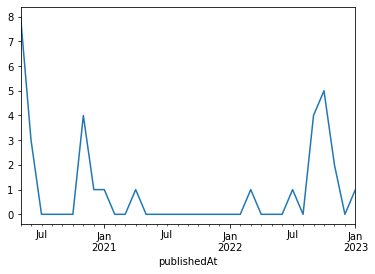

In [ ]:
# Resumindo dados da data de publicação em meses e gerando uma série temporal,
# contendo o número de vídeos por mês
df.resample('M', on = 'publishedAt')['video_id'].count().plot()